## Model Grid Search

I have written a grid search function for the PloufModel. It partly uses the ParameterGrid function of sklearn which shuffles the param_grid dictionary to give you all possible combinations.

It seems to not want to work in jupyter notebooks when try to run it after the first time. I am unsure why. It seems to only work properly if you clear the kernel and run again.

I am writing less comments here since there is duplicate workflow to the other notebook

In [1]:
# importing library functions
from source.model_data import grid_search
from source.load_data import path_to_df
from pathlib import Path
from source.plot_data import plot_model,plot_residuals
from source.stats import*

# setting shape variable as before
SHAPE_DIR = './shapes'
LINE_DIR = './patches'

# SHAPE = path_to_df(Path(f'{SHAPE_DIR}/line_56a_shape2.utm'),raw=False) 
LINE = path_to_df(Path(f'{LINE_DIR}/example_line.csv'),raw=False)

### The grid search function takes as arguments a line dataframe to model, a shape dataframe for the model, a parameter dictionary which holds lists of each parameter you want to search through and one of my two error functions, get_rmse or get_abs_max_error, which it will use as the metric to minimize. 

#### The function will return the dictionary with parameters which got the lowest error score and the error score. 

with absolute maximum error

In [2]:
# initializing the parameters for the grid search. It will search through all combinations of these 
param_grid = {
        'top':[40,41,42,43,44,45], #m
        'bottom':[50,51,52,53,54,55], #m
        'intensity':[0.5,0.6,0.7,0.8,0.9,1], # Amp/m
        'shape':[f'{SHAPE_DIR}/line_56a_shape2.utm',f'{SHAPE_DIR}/line_56a_shape3.utm']
        }


lowest_error,good_grid = grid_search(LINE,param_grid,get_abs_max_error) # can use 'get_rmse' or 'get_abs_max_error' as the scoring
print("\n")
print('Final Grid: ',good_grid)
print('Final Error: ',lowest_error)
print("\n")



Final Grid:  {'bottom': 50, 'intensity': 0.5, 'shape': './shapes/line_56a_shape2.utm', 'top': 40}
Final Error:  60.272242554261226




with rmse

In [3]:
lowest_error,good_grid = grid_search(LINE,param_grid,get_rmse) # can use 'get_rmse' or 'get_abs_max_error' as the scoring

print("\n")
print('Final Grid: ',good_grid)
print('Final Error: ',lowest_error)
print("\n")



Final Grid:  {'bottom': 50, 'intensity': 0.5, 'shape': './shapes/line_56a_shape3.utm', 'top': 45}
Final Error:  122.83184206372766




In [4]:
SHAPE = path_to_df(Path(f'{SHAPE_DIR}/line_56a_shape3.utm'),raw=False) #any file in the shapes dir can be used.

param_grid = {
        'top':[40,41,42,43,44,45], #m
        'bottom':[50,51,52,53,54,55], #m
        'intensity':[0.5,0.6,0.7,0.8,0.9,1], # Amp/m
        }

lowest_error,good_grid = grid_search(LINE,param_grid,get_rmse,shape=SHAPE) # can use 'get_rmse' or 'get_abs_max_error' as the scoring
print("\n")
print('Final Grid: ',good_grid)
print('Final Error: ',lowest_error)
print("\n")



Final Grid:  {'bottom': 50, 'intensity': 0.5, 'top': 45}
Final Error:  122.83184206372766




Now we can run a final model with one of the resultant parameter sets

In [5]:
grid_model = PloufModel(
    line = LINE,
    shape= SHAPE,
    top_bound= good_grid['top'],
    bottom_bound= good_grid['bottom'],
    inclination= -67,
    declination= 177,
    intensity= good_grid['intensity']
)

grid_model.run_plouf()

#### Now we can see the plots and stats as with the normal version of the plouf model

 rmse should match if it is the error function you passed in. 

Absolute Max Error:  289.8517396554407
RMSE:  122.83184206372766
Durban-WAtson 0.00042338565027288483


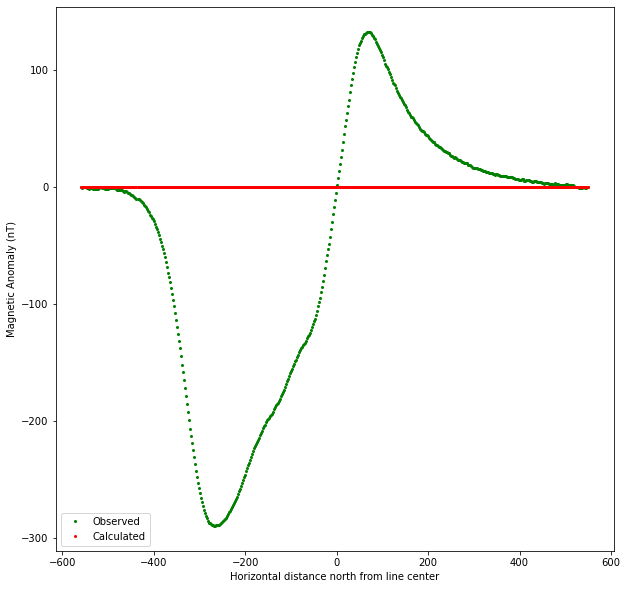

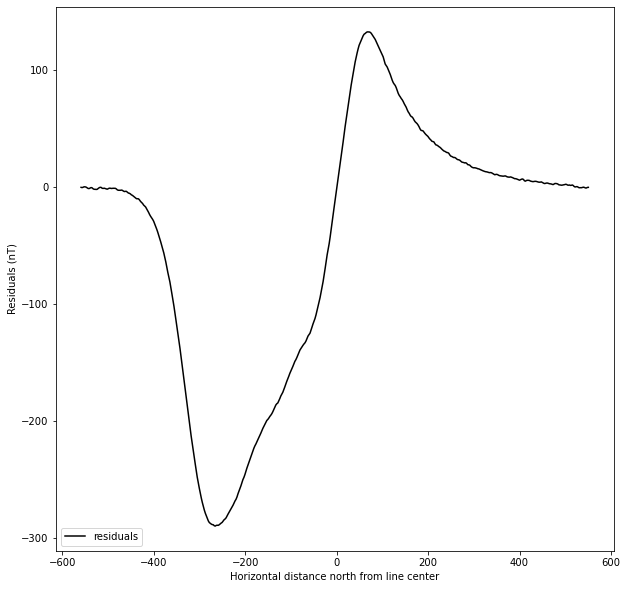


 Splitting data into 10 bins
Confidence Table:
   max difference  degrees of freedom  at 95% confidence
0        0.086275                 509           0.060281


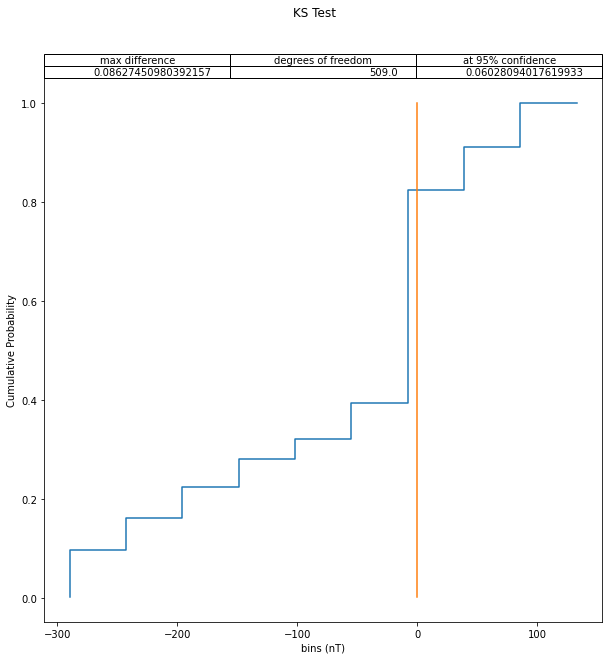

In [6]:
print("Absolute Max Error: ",get_abs_max_error(grid_model))
print("RMSE: ",get_rmse(grid_model))
print("Durban-WAtson",get_durban_watson(grid_model))

plot_model(grid_model)
plot_residuals(grid_model)
ks_test(grid_model,bins=10)